### Packages

In [1]:
import os
import cv2
import time
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


###  46 Classes
#### 36 characters, 10 digits

In [2]:
Classes = ['ana', 'ath', 'ba', 'bha', 'cha', 'char', 'chha', 'chhyya', 'da', 'dda', 'ddha', 'dha', 'dui', 'ek', 'ga', 'gha', 'gya', 'ha', 'ja', 'jha', 'ka', 'kha',
           'kna', 'la', 'ma', 'na', 'nau', 'pa', 'pach', 'pha', 'ra', 'sat', 'sha1', 'sha2', 'sha3', 'sunya', 'ta', 'tha', 'tin', 'tra', 'tta', 'ttha', 'wo', 'xa', 'ya', 'yan']

### Loading data from directory

In [3]:
data = []
Datadirectory = "dataset/Train"
def create_data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                data.append([img_array,class_num])
            except Exception as e:
                pass

In [5]:
create_data()

In [6]:
print("Total Training Data : ",len(data))

Total Training Data :  78200


### Shuffle dataset and split into features and labels

In [7]:
random.shuffle(data)

In [8]:
X = []        # features
Y = []        # labels

for features,label in data:
    X.append(features)
    Y.append(label)

In [8]:
X = np.array(X)
Y = np.array(Y)
print("Shape of X is: ",X.shape)
print("Shape of Y is: ",Y.shape)

Shape of X is:  (78200, 32, 32)
Shape of Y is:  (78200,)


### Visualize some data

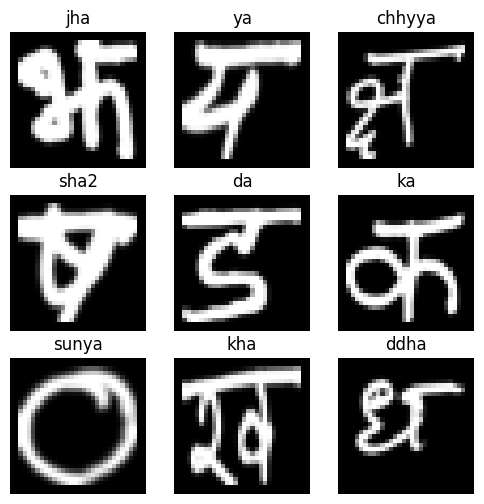

In [9]:
plt.figure(figsize=(6, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X[i], cmap=plt.cm.gray)
    plt.title(Classes[Y[i]])
    plt.axis("off")

### Normalize data

In [10]:
X = tf.keras.utils.normalize(X,axis=1)

### Visualize after Normalization

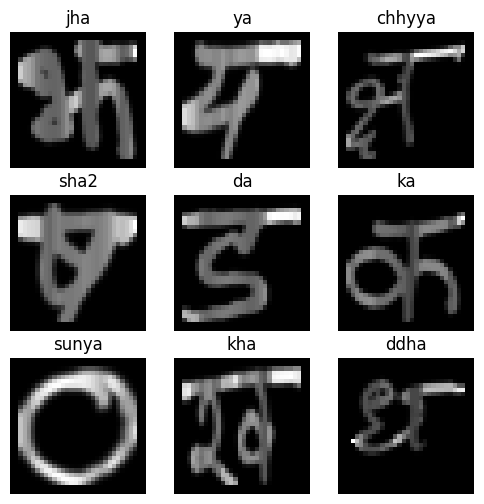

In [11]:
plt.figure(figsize=(6, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X[i], cmap=plt.cm.gray)
    plt.title(Classes[Y[i]])
    plt.axis("off")

### Resizing X for convolution 
#### Input Image - (32,32,1)

In [12]:
IMG_SIZE = 32
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(X.shape)

(78200, 32, 32, 1)


### CNN Model
###### Convolution -> Convolution -> Pooling -> Dropout -> Convolution -> Convolution -> Pooling -> Dropout -> Flatten -> Dense -> Dropout -> Softmax

In [ ]:
model = Sequential([
    # first convolutional block containing two convolution layers followed by MaxPooling and Droppout
    # 32 filters of size 3X3
    tfl.Conv2D(filters= 32 ,kernel_size =3,input_shape = X.shape[1:]),
    tfl.ReLU(),
    tfl.Conv2D(filters= 32 ,kernel_size =3),
    tfl.ReLU(),
    tfl.MaxPool2D(),
    tfl.Dropout(0.25),
    
    # second convolutional block similar to the first
    # 64 filters of size 3X3
    tfl.Conv2D(filters= 64 ,kernel_size =3),
    tfl.ReLU(),
    tfl.Conv2D(filters= 64 ,kernel_size =3),
    tfl.ReLU(),
    tfl.MaxPool2D(),
    tfl.Dropout(0.25),
    
    # Flatten and Fully Connected Layers
    tfl.Flatten(),
    tfl.Dense(256,activation='relu'),
    tfl.Dropout(0.5),
    
    # Output layer with 46 units
    tfl.Dense(46,activation='softmax')  
])

### Summary of the model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 re_lu (ReLU)                (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 re_lu_1 (ReLU)              (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                        

### Adam Optimization with Categorical Crossentropy loss function

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

### Training Model with 15% data for cross validation

In [16]:
start = time.time()
history = model.fit(X,Y,epochs=10,validation_split= 0.15 ,batch_size=32)
end = time.time()
print("\nTraining time: ",(end-start)/60,"min")

Epoch 1/10
2078/2078 [==============================] - 181s 86ms/step - loss: 0.9371 - accuracy: 0.7307 - val_loss: 0.1819 - val_accuracy: 0.9438
Epoch 2/10
2078/2078 [==============================] - 176s 85ms/step - loss: 0.3061 - accuracy: 0.9064 - val_loss: 0.1237 - val_accuracy: 0.9635
Epoch 3/10
2078/2078 [==============================] - 187s 90ms/step - loss: 0.2192 - accuracy: 0.9321 - val_loss: 0.0993 - val_accuracy: 0.9698
Epoch 4/10
2078/2078 [==============================] - 133s 64ms/step - loss: 0.1783 - accuracy: 0.9445 - val_loss: 0.0821 - val_accuracy: 0.9759
Epoch 5/10
2078/2078 [==============================] - 70s 34ms/step - loss: 0.1508 - accuracy: 0.9529 - val_loss: 0.0782 - val_accuracy: 0.9779
Epoch 6/10
2078/2078 [==============================] - 75s 36ms/step - loss: 0.1351 - accuracy: 0.9578 - val_loss: 0.0692 - val_accuracy: 0.9782
Epoch 7/10
2078/2078 [==============================] - 95s 46ms/step - loss: 0.1187 - accuracy: 0.9623 - val_loss: 0.05

### Plotting Training and Validation Loss and Accuracy

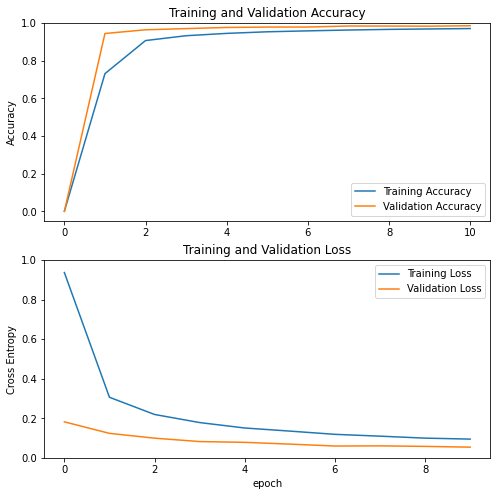

In [18]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Saving Our Model

In [20]:
jsonModel = model.to_json()
with open("nhwcr.json", "w") as json_file:
    json_file.write(jsonModel)
model.save_weights("nhwcr.h5")

### Loading Model

In [21]:
modelFile = open('nhwcr.json', 'r')
jsonModel = modelFile.read()
modelFile.close()
model1 = tf.keras.models.model_from_json(jsonModel)

model1.load_weights("nhwcr.h5")    #Weights
print("Model Loaded")

model1.save('nhwcr.hdf5')
model1 = tf.keras.models.load_model('nhwcr.hdf5')

Model Loaded


### Loading Test Dataset

In [81]:
test_data = []
Datadirectory = "dataset/Test"
def loadTestData():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                test_data.append([img_array,class_num])
            except Exception as e:
                print("Cannot read")

loadTestData()
print("Total Test Data : ",len(test_data))

random.shuffle(test_data)
X_test = []        
Y_test = []        

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = tf.keras.utils.normalize(X_test,axis=1)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

Total Test Data :  12425


### Evaluating Test Data

In [82]:
# compiling loaded model
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [83]:
test_loss, test_accuracy = model1.evaluate(X_test, Y_test)
print("Test loss: ",test_loss)
print("Test accuracy: ",test_accuracy)

389/389 [==============================] - 3s 7ms/step - loss: 0.0501 - accuracy: 0.9859
Test loss:  0.050148531794548035
Test accuracy:  0.98591548204422


### Prediction

In [84]:
predictions = model1.predict([X_test])

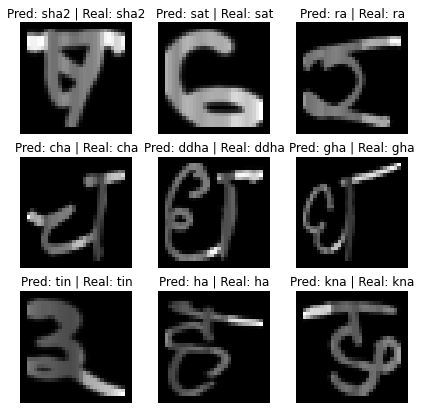

In [85]:
plt.figure(figsize=(7,7))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = X_test[i]
    label = Y_test[i]
    prediction = np.argmax(predictions[i])
    title = f"Pred: {Classes[prediction]} | Real: {Classes[label]}"
    plt.title(title)
    plt.imshow(X_test[i], cmap=plt.cm.gray)
    plt.axis("off")

### Prediction on our image

Text(0.5, 1.0, 'Prediction: pa')

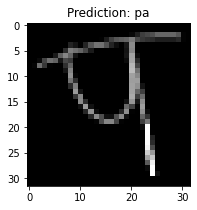

In [112]:
img = cv2.imread("saujan.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
img = tf.keras.utils.normalize(img,axis=1)
img1 = np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1)
pred = Classes[np.argmax(model1.predict(img1))]

plt.figure(figsize=(3,3))
plt.imshow(img,cmap=plt.cm.gray)
title = f"Prediction: {pred}"
plt.title(title)